# E-Commerce Customer Analysis

### Muhamad Fajar Latiful Habib

- Business Problem
- Data Understanding
- Data Cleaning
- Data Analysis
- Data Preprocessing and Feature Engineering
- Modeling
- Conclusion and Recommendation

# Bussines Problem

# Latar Belakang

Di era modern ini, mempertahankan pelanggan menjadi kunci utama bagi bisnis agar tetap kompetitif. Menurut penelitian dari [Harvard Business Review](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), meningkatkan retensi pelanggan sebesar 5% dapat meningkatkan keuntungan hingga 25-95%. Pelanggan setia juga cenderung membelanjakan lebih banyak uang, dengan peningkatan pengeluaran sebesar 67% pada bulan 31-36 dibandingkan dengan bulan 0-6, seperti dilaporkan oleh [Accenture](https://www.accenture.com/us-en/insight-customer-loyalty). Selain itu, biaya untuk mendapatkan pelanggan baru bisa mencapai lima kali lebih tinggi daripada mempertahankan pelanggan yang sudah ada, menurut [Invesp](https://www.invespcro.com/blog/customer-acquisition-retention/).

Temuan-temuan ini menunjukkan pentingnya menjaga hubungan baik dengan pelanggan yang sudah ada, termasuk dalam bisnis E-commerce. Misalnya, laporan dari [McKinsey & Company](https://www.mckinsey.com/business-functions/marketing-and-sales/our-insights/the-loyalty-decalogue) mengungkapkan bahwa peningkatan pengalaman pelanggan dapat meningkatkan loyalitas dan retensi. Lebih jauh lagi, ketika pelanggan setia meninggalkan bisnis, biaya untuk mendapatkan pelanggan baru dan mencapai tingkat loyalitas yang sama bisa mencapai 16 kali lebih besar.

Oleh karena itu, sebuah perusahaan E-commerce ingin menganalisis pelanggan yang berhenti menggunakan layanan mereka, yang dikenal sebagai *customer churn*. Dengan mengetahui dan memprediksi pelanggan yang berpotensi churn, perusahaan dapat menyesuaikan strategi pemasaran mereka serta memberikan penawaran khusus untuk menjaga pelanggan tetap setia.


#### Pernyataan Masalah

Mengabaikan pelanggan setia yang churn dapat merugikan perusahaan. Untuk mencegah hal ini, perusahaan harus berusaha menjaga keterlibatan pelanggan di platform e-commerce. Salah satu pendekatan yang bisa digunakan adalah memberikan promosi. Namun, tanpa strategi yang baik, pengeluaran untuk promosi dan sumber daya yang digunakan bisa menjadi tidak efisien.

#### Tujuan

Untuk menghadapi masalah tersebut, perusahaan bisa melakukan prediksi customer churn sebagai langkah preventif. Dengan mengetahui pelanggan yang berpotensi churn, perusahaan dapat menyusun strategi pemasaran yang lebih terarah, yang pada gilirannya dapat mengurangi biaya pemasaran dan meningkatkan profitabilitas dengan mempertahankan pelanggan setia.

Selain itu, mengetahui faktor-faktor yang mempengaruhi customer churn juga membantu dalam membuat keputusan strategis yang lebih baik dalam pemasaran.

#### Pendekatan Analitik

Pendekatan analitik yang digunakan melibatkan membangun model, pengujian, dan penerapan model machine learning klasifikasi untuk memprediksi apakah pelanggan akan mengalami *churn* atau tidak berdasarkan data historis mereka.


#### Metrix Evaluasi

|       | N-Pred| P-Pred |
| --- | --- | --- |
| **N-Act**     | TP | FP |
| **P-Act**      | FN | TP |

Target:   
0 : Pelanggan tidak *churn*  
1 : Pelanggan *churn*

Type 1 error : False Positive  
Konsekuensi: Mengeluarkan biaya untuk pelanggan yang kurang tepat atau pelanggan yang tidak akan churn. 

Type 2 error : False Negative  
Konsekuensi: Hilangnya pelanggan loyal

Berdasarkan dampaknya, pemilihan model yang tepat harus fokus pada mengurangi kehilangan pelanggan loyal sambil meminimalkan biaya pemasaran untuk pelanggan yang kurang relevan. Untuk menyeimbangkan recall dan precision pada pelanggan churn, metrik yang digunakan adalah ROC-AUC.

# Data Understanding

In [212]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score


# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pickle
from xgboost import XGBClassifier


# Set max columns
pd.set_option('display.max_columns', None)

In [99]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


In [100]:
df.info()
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


(3941, 11)

In [101]:
# Statistik deskriptif masing-masing kolom
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


| Attribute | Data Type | Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float |Lama Berlangganan | Quant. Kontinu |
| Warehouse to Home | Float | Jarak antara gudang ke rumah pelanggan | Quant. Kontinu |
| Number of Device | Int | Jumlah perangkat yang terdaftar | Quant. Diskrit |
| Prefered Order Cat | Object | Kategori disukai pelanggan sebulan terakhir| Qual. Nominal |
| Satisfaction Score | Int | Skor kepuasan pelanggan | Qual. Ordinal |
| Marital | Object | Status pernikahan pelanggan | Qual. Nominal |
| Number of Address | Int | Jumlah alamat yang terdaftar | Quant. Diskrit |  
| Complain | Int | 0 : Tidak Ada complain & 1 : ada complain | Qual. Nominal|
| Day Since Last Order | Float | Hari sejak pemesanan terakhir | Quant. Kontinu |
| Cashback Amount | Float | Rata-rata cashback sebulan terakhir | Quant. Kontinu |
| Churn | Int | 0 - Tidak *churn* & 1 - *Churn* | Qual. Nominal | 

Diketahui :  
1. Dataset: Memiliki 3941 baris dan 11 kolom.
2. Variabel Numerik:
    - Kuantitatif: 
        - Kontinu : Tenure, Warehouse to Home, Day Since Last Order, dan Cashback Amount.
        - Diskrit : Number of Device, Number of Address
    - Kualitatif: 
        - Nominal : complain dan churn (dalam format yes/no).
        - Ordinal : satisfaction score (mengandung skala urutan).
3. Variabel Kategorikal:
    - Prefered Order Cat dan Marital.
4. Data Cleaning:
    - Terdapat beberapa missing values yang perlu ditangani.
    - Seperti Tenure, WarehouseToHome, DaySinceLastOrder  

# Data Cleaning

#### Cek Duplikat & Typo

In [102]:
DfDesc = []
for i in df.columns :
    DfDesc.append([
        i, 
        df[i].nunique(), 
        df[i].unique()])

pd.DataFrame(columns=[
    'dataFeatures',
    'unique', 
    'sample'],data=DfDesc)

,dataFeatures,unique,sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


In [103]:
# Jumlah setiap kategori
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

Pada fitur PreferedOrderCat ada kategori 'Mobile' diganti dengan 'Mobile Phone' di seluruh baris, sehingga semua baris yang sebelumnya diberi label 'Mobile' akan diberi label 'Mobile Phone'.

In [104]:
# Ubah Mobile jadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: count, dtype: int64

Setelah kategori diperbarui, langkah selanjutnya adalah memeriksa adanya duplikat. Karena tidak ada informasi tentang Customer ID, maka akan dilakukan pemeriksaan setiap baris untuk menemukan data yang identik

In [105]:
# Jumlah Duplikat
duplikat = df.duplicated().sum()
PercentageDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {duplikat}, Persentase Data Duplikat: {PercentageDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Dari 3941 baris data, ditemukan : 
- 672 baris yang duplikat, yaitu sekitar 17,05%. 

Karena dataset tidak memiliki Customer ID, semua baris duplikat dianggap sama persis. Langkah selanjutnya adalah menghapus baris-baris duplikat tersebut. Menghapus duplikat penting karena bisa mempengaruhi akurasi model machine learning dan membuat hasil evaluasi menjadi tidak akurat akibat kebocoran informasi dari data yang digunakan untuk pelatihan

In [106]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)
print(f'Shape: {df.shape}, Cek duplikat: {df.duplicated().sum()}')

Shape: (3269, 11), Cek duplikat: 0


#### Missing Value

In [107]:
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [108]:
tenure_mv = ((df['Tenure'].isna().sum() / df['Tenure'].shape[0]) * 100).round(2)
WarehouseToHome_mv = ((df['WarehouseToHome'].isna().sum() / df['WarehouseToHome'].shape[0]) * 100).round(2)
DaySinceLastOrder = ((df['DaySinceLastOrder'].isna().sum() / df['DaySinceLastOrder'].shape[0]) * 100).round(2)

print(f"Persentase nilai hilang di kolom 'Tenure': {tenure_mv}%")
print(f"Persentase nilai hilang di kolom 'WarehouseToHome': {WarehouseToHome_mv}%")
print(f"Persentase nilai hilang di kolom 'DaySinceLastOrder': {DaySinceLastOrder}%")
print(f"Jumlah missing value: {df.isnull().sum().sum()}")
print(f"Persentase Jumlah Missing Value : {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%")

Persentase nilai hilang di kolom 'Tenure': 4.86%
Persentase nilai hilang di kolom 'WarehouseToHome': 4.13%
Persentase nilai hilang di kolom 'DaySinceLastOrder': 5.54%
Jumlah missing value: 475
Persentase Jumlah Missing Value : 14.53%


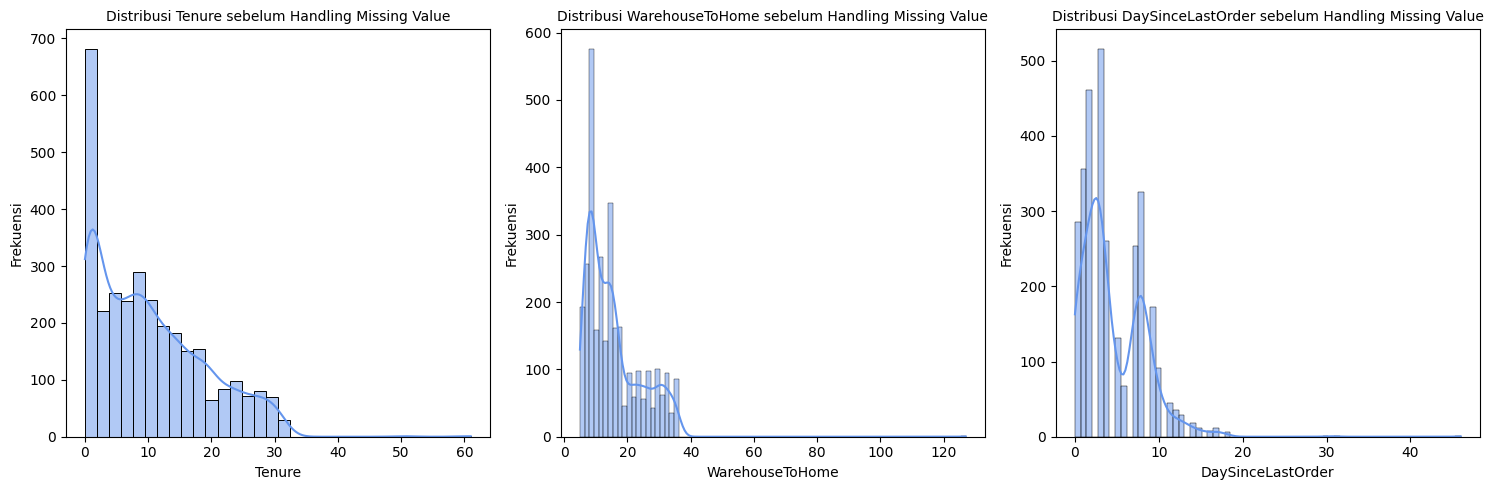

In [109]:
# Visualisasi distribusi sebelum imputasi
features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15, 5))  # Ukuran figure yang sesuai untuk 3 subplot

for i in range(len(features)):
    plt.subplot(1, 3, i+1)  # 1 baris, 3 kolom
    sns.histplot(df[features[i]], kde=True, color='cornflowerblue')
    plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)
    plt.xlabel(features[i])
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Nilai hilang totalnya mencapai 14.53%, itu bisa menjadi cukup signifikan, dan penghapusan baris mungkin tidak selalu menjadi solusi terbaik. Dalam kasus seperti ini, diputuskan untuk melakukan imputasi 

In [110]:
# Menghitung median untuk setiap kolom
median_tenure = df['Tenure'].median()
median_warehouse_to_home = df['WarehouseToHome'].median()
median_day_since_last_order = df['DaySinceLastOrder'].median()

# Mengisi nilai hilang dengan median
df['Tenure'].fillna(median_tenure, inplace=True)
df['WarehouseToHome'].fillna(median_warehouse_to_home, inplace=True)
df['DaySinceLastOrder'].fillna(median_day_since_last_order, inplace=True)

display(df.head())
print("\nJumlah nilai hilang setelah imputasi:")
display(df[features].isna().sum())

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0



Jumlah nilai hilang setelah imputasi:


Tenure               0
WarehouseToHome      0
DaySinceLastOrder    0
dtype: int64

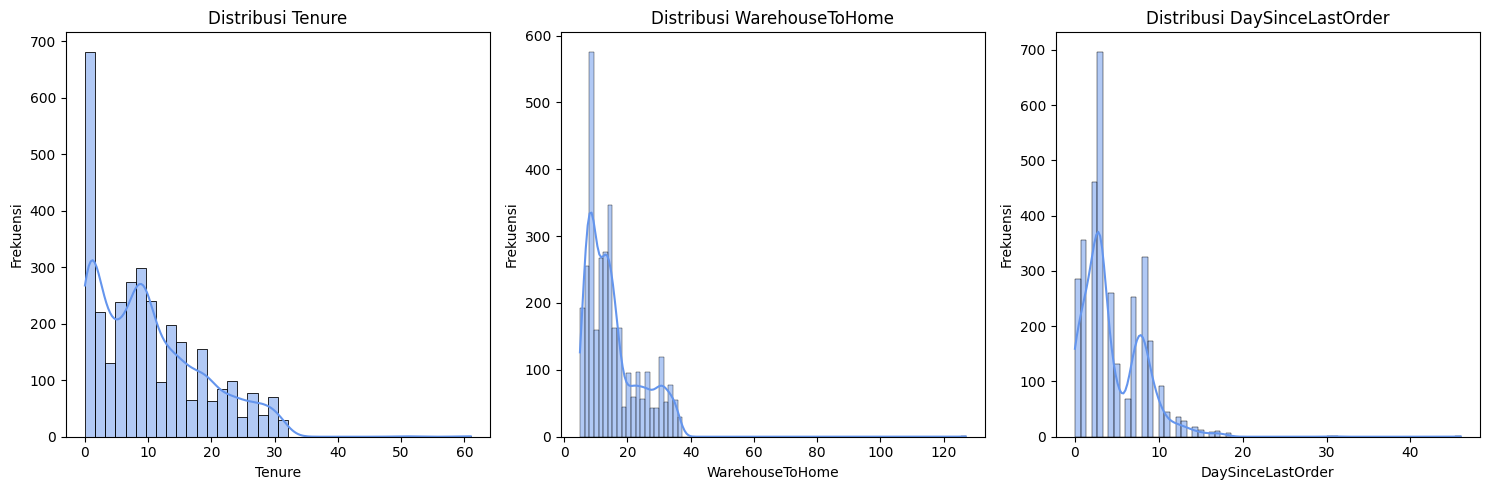

In [111]:
# Visualisasi distribusi setelah imputasi
plt.figure(figsize=(15, 5))  # Ukuran figure yang sesuai untuk 3 subplot
for a, column in enumerate(['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']):
    plt.subplot(1, 3, a+1)  # 1 baris, 3 kolom
    sns.histplot(df[column], kde=True, color='cornflowerblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Distribusi data sebelum dan setelah proses imputasi tidak mengalami perbedaan yang signifikan, menunjukkan bahwa imputasi telah diterapkan dengan cukup baik tanpa mengubah secara drastis karakteristik distribusi data asli.

#### Outliers

Beberapa model yang akan digunakan, seperti Logistic Regression dan K-Nearest Neighbour, cenderung sensitif terhadap outlier. Oleh karena itu, perlu dilakukan analisis terhadap keberadaan outlier dalam dataset.

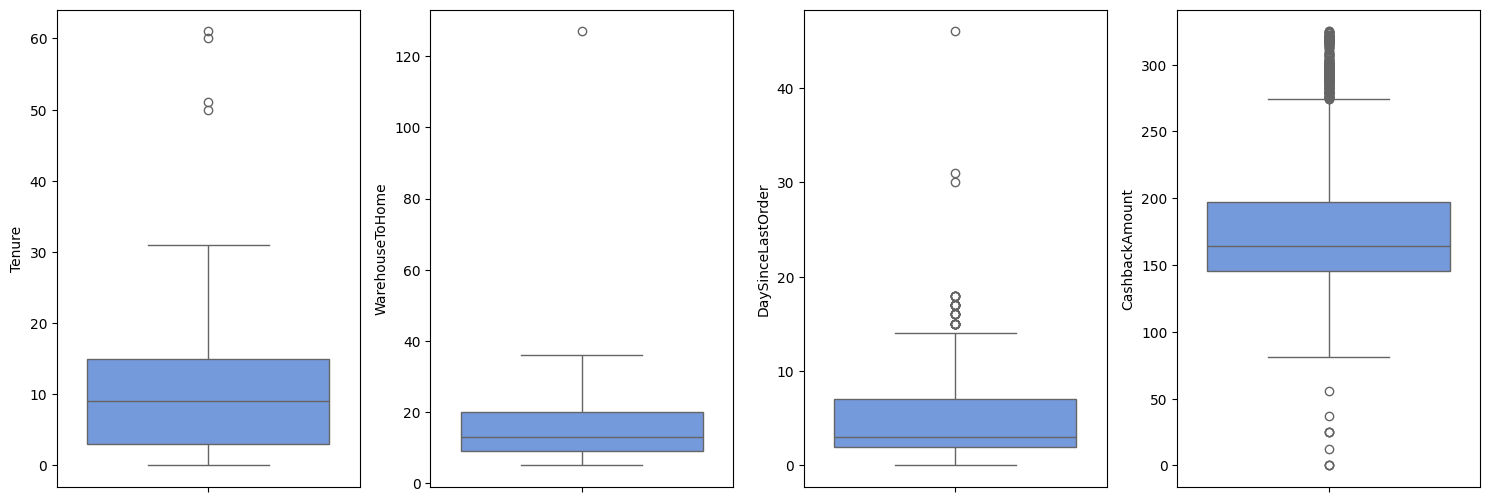

In [124]:
# Mencari outlier pada data kontinu dengan boxplot
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder','CashbackAmount']
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

In [129]:
features = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

# Menghitung lower bound, upper bound, outlier, dan persentase outlier
for feature in features:
    # Menghitung Q1, Q3, dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Menghitung lower bound dan upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mendeteksi outlier
    condition = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    outlier_count = df[condition].shape[0]  # Jumlah outlier
    total_count = df[feature].notna().shape[0]  # Jumlah data non-NaN
    
    # Menghitung persentase outlier
    percentage_outliers = (outlier_count / total_count) * 100 if total_count > 0 else 0
    
    # Menampilkan hasil
    print(f'Feature: {feature}')
    print(f'  Lower Bound: {round(lower_bound, 2)}')
    print(f'  Upper Bound: {round(upper_bound, 2)}')
    print(f'  Outliers: {outlier_count}')
    print(f'  Percentage of Outliers: {round(percentage_outliers, 2)}%')
    print()  # Baris baru untuk pemisah

Feature: Tenure
  Lower Bound: -15.0
  Upper Bound: 33.0
  Outliers: 4
  Percentage of Outliers: 0.12%

Feature: WarehouseToHome
  Lower Bound: -7.5
  Upper Bound: 36.5
  Outliers: 1
  Percentage of Outliers: 0.03%

Feature: DaySinceLastOrder
  Lower Bound: -5.5
  Upper Bound: 14.5
  Outliers: 40
  Percentage of Outliers: 1.22%

Feature: CashbackAmount
  Lower Bound: 69.04
  Upper Bound: 274.0
  Outliers: 253
  Percentage of Outliers: 7.74%



Berdasarkan perhitungan yang dilakukan, outlier pada kolom Tenure dan WarehouseToHome akan dihapus karena jumlahnya kecil. Sedangkan outlier pada kolom DaySinceLastOrder dan CashbackAmount akan dibiarkan, karena nilai-nilai tersebut masih dianggap wajar meskipun variansinya tinggi. Untuk CashbackAmount, akan dilakukan penanganan lebih lanjut dalam tahap preprocessing dengan menerapkan teknik binning.

In [131]:
# Hapus kolom dengan outlier
df.drop(df[df['Tenure']>33].index,inplace=True)
df.drop(df[df['WarehouseToHome']>36.5].index,inplace=True)

display(df.shape)

(3264, 11)

# Data Analysis

Setelah pembersihan data selesai, analisis akan dilakukan untuk memahami karakteristik pelanggan yang mengalami churn. Ini termasuk mengevaluasi proporsi antara pelanggan yang churn dan yang tidak churn.

In [134]:
# Pelanggan tidak churn dan churn
df['Churn'].value_counts()

Churn
0    2731
1     533
Name: count, dtype: int64

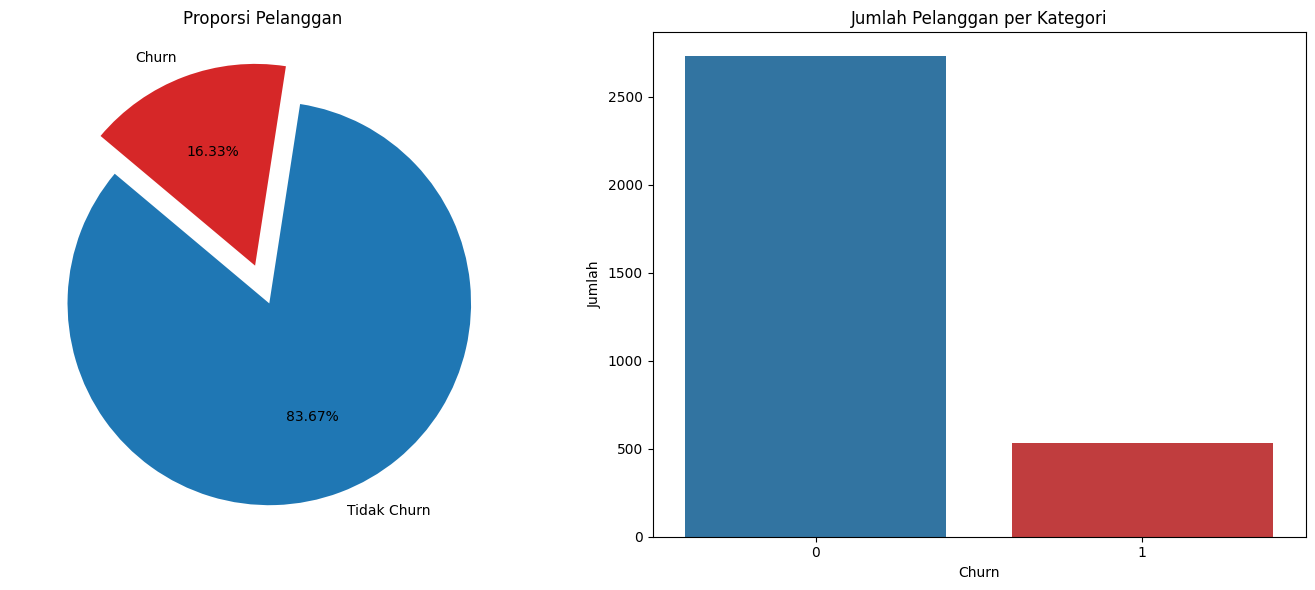

In [141]:
# Perbandingan pelanggan tidak churn dan churn
plt.figure(figsize=(14, 6))
# Pie Chart
plt.subplot(1, 2, 1)
plt.pie(df['Churn'].value_counts(), labels=['Tidak Churn', 'Churn'], colors=['tab:blue', 'tab:red'],
        autopct='%.2f%%', explode=(0.1, 0.1), startangle=140)
plt.title('Proporsi Pelanggan')
# Bar Plot
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Churn', palette=['tab:blue', 'tab:red'])
plt.title('Jumlah Pelanggan per Kategori')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

Data menunjukkan ketidakseimbangan kelas, di mana proporsi pelanggan yang tidak churn adalah 83,67%, sementara proporsi pelanggan yang churn adalah 16,33%. Ketidakseimbangan ini dapat mempengaruhi akurasi model machine learning, terutama dalam memprediksi kelas minoritas. Untuk mengatasi masalah ini, akan digunakan metode resampling SMOTE (Synthetic Minority Oversampling Technique) untuk menambah jumlah data pada kelas minoritas selama proses pemodelan.

Selanjutnya, analisis akan difokuskan pada pengaruh masing-masing variabel (fitur) terhadap customer churn.

#### Variabel Numerik - Kontinu

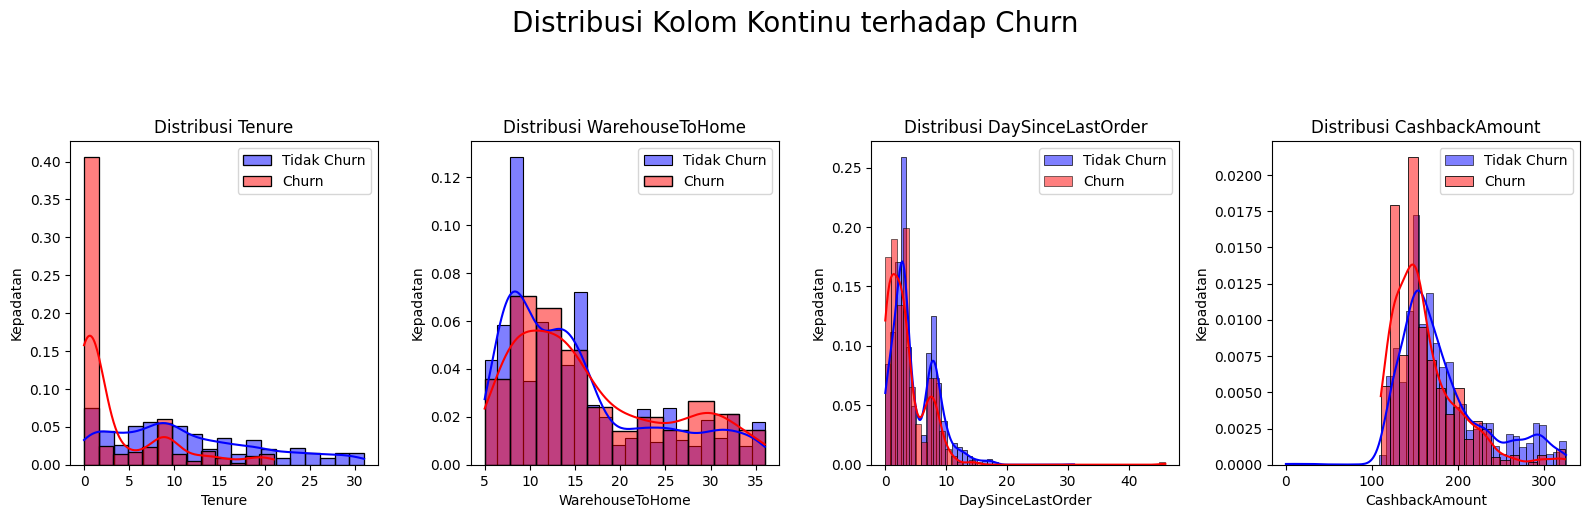

In [144]:
kontinu = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']
# Visualisasi
plt.figure(figsize=(16, 17))

for i, col in enumerate(kontinu, start=1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df[df['Churn'] == 0], x=col, kde=True, color='blue', label='Tidak Churn', stat='density')
    sns.histplot(data=df[df['Churn'] == 1], x=col, kde=True, color='red', label='Churn', stat='density')
    plt.legend()
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Kepadatan')

plt.suptitle('Distribusi Kolom Kontinu terhadap Churn', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

insight : 
- Tenure (Masa Aktif): Pelanggan yang tidak churn biasanya aktif kurang dari 5 bulan. Pelanggan yang churn sering aktif - hanya 0-1 bulan.
- WarehouseToHome (Jarak Gudang ke Rumah): Baik pelanggan yang tidak churn maupun yang churn umumnya berada dalam jarak 0-10 km dari gudang.
- DaySinceLastOrder (Hari Sejak Pemesanan Terakhir): Pelanggan yang tidak churn biasanya memesan dalam 0-5 hari terakhir. Pelanggan yang churn cenderung memesan dalam rentang waktu yang lebih panjang, dengan churn meningkat dalam 0-10 hari.
- CashbackAmount (Jumlah Cashback): Pelanggan yang tidak churn biasanya mendapatkan cashback antara 0-100. Pelanggan yang churn juga mendapat cashback dalam kisaran ini, dengan sedikit lonjakan pada cashback yang lebih tinggi (di atas 200).

#### Variabel numerik Quantitatif diskrit dan numerik Qualitatif

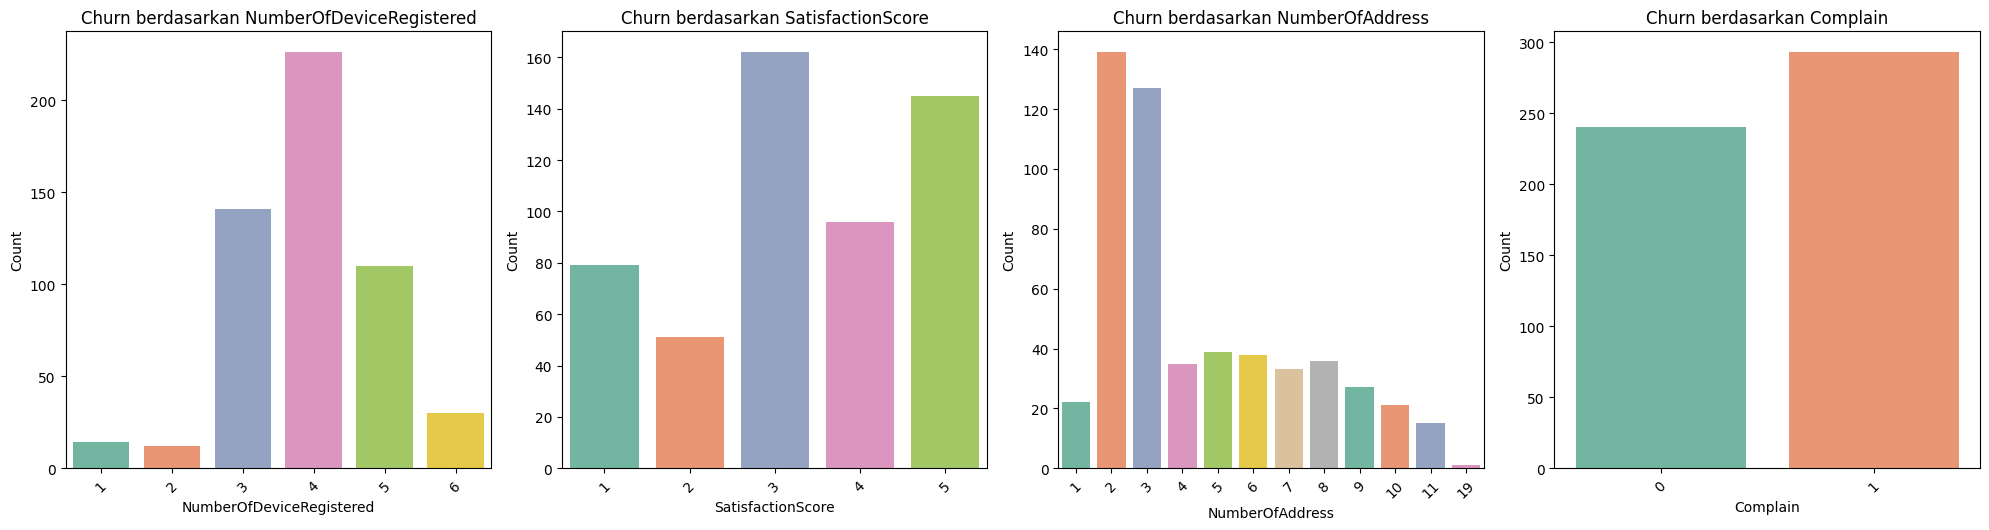

In [157]:
kolomnum = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']

# Membuat figure dan mengatur ukuran
plt.figure(figsize=(20, 20))

# Iterasi untuk setiap variabel
for index, kolom in enumerate(kolomnum, start=1):
    plt.subplot(4, 4, index)  # 4x4 grid 
    sns.countplot(x=df[df['Churn']==1][kolom], palette='Set2')  # Menggunakan palette yang berbeda
    plt.title(f'Churn berdasarkan {kolom}', fontsize=12)  # Menyesuaikan ukuran font judul
    plt.xlabel(kolom, fontsize=10)  # Menambahkan label x
    plt.ylabel('Count', fontsize=10)  # Menambahkan label y
    plt.xticks(rotation=45)  # Memutar label sumbu x jika diperlukan
    plt.tight_layout()  
plt.show()

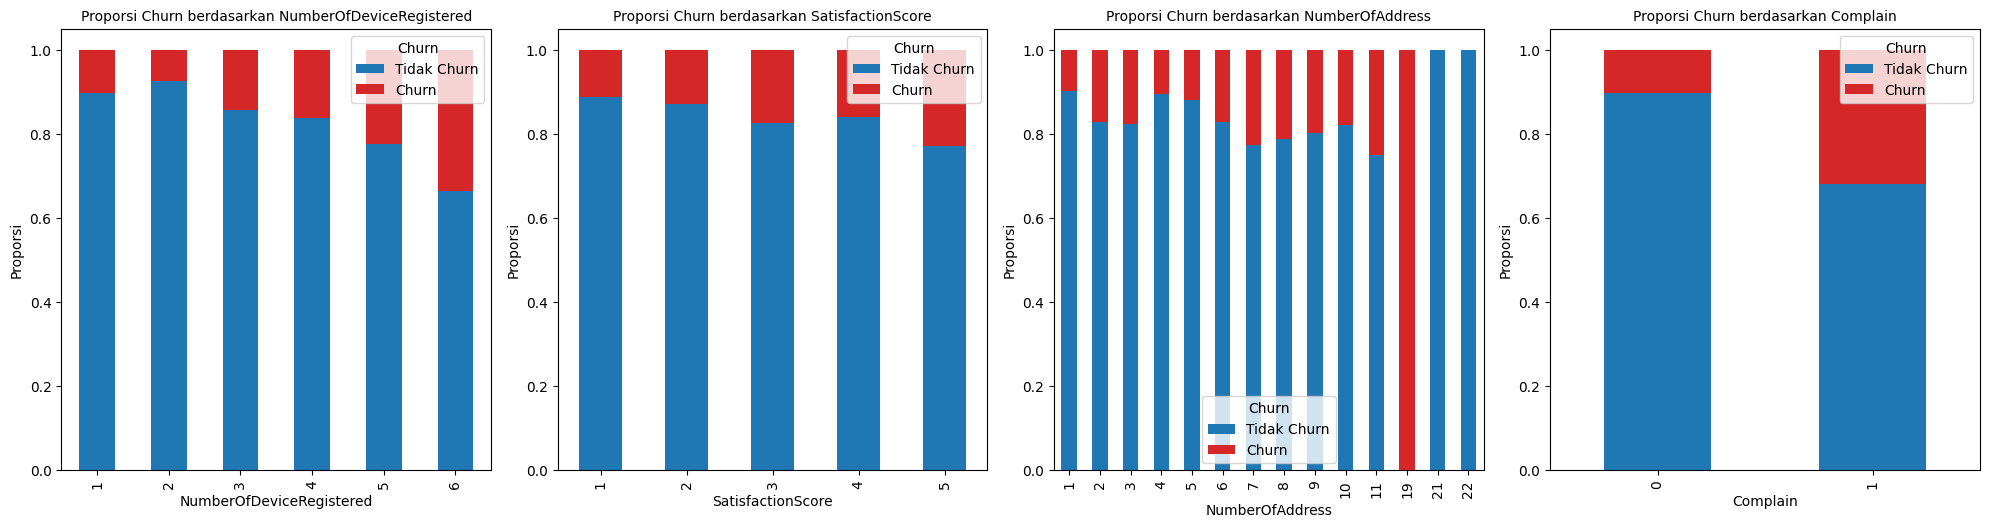

In [165]:
# Daftar kolom yang akan dianalisis
kolomnum = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain']
# Membuat figure dan mengatur ukuran
plt.figure(figsize=(20, 20))
# Iterasi untuk setiap variabel
for index, kolom in enumerate(kolomnum, start=1): 
    ax = plt.subplot(4, 4, index) 
    plt.title(f'Proporsi Churn berdasarkan {kolom}', fontsize=10)
    # Membuat crosstab dan plot
    crosstab = pd.crosstab(df[kolom], df['Churn'], normalize='index').sort_index()
    crosstab.plot(color=['tab:blue', 'tab:red'], kind='bar', stacked=True, ax=ax)
    # Menambahkan label sumbu
    ax.set_xlabel(kolom)
    ax.set_ylabel('Proporsi')
    ax.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
plt.tight_layout()  # Mengatur tata letak agar tidak saling bertumpuk
plt.show()

<Figure size 1000x600 with 0 Axes>

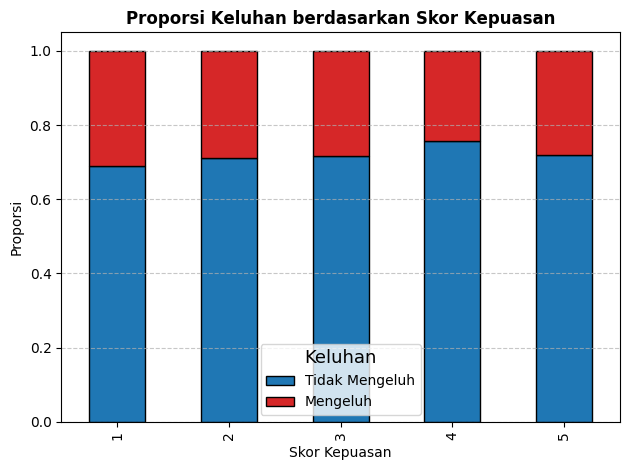

In [163]:
# Membuat crosstab dan plot
crosstab = pd.crosstab(df['SatisfactionScore'], df['Complain'], normalize='index')
# Plotting
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, color=['tab:blue', 'tab:red'], edgecolor='black')

plt.title('Proporsi Keluhan berdasarkan Skor Kepuasan', fontsize=12, fontweight='bold')
plt.xlabel('Skor Kepuasan', fontsize=10)
plt.ylabel('Proporsi', fontsize=10)
plt.legend(title='Keluhan', title_fontsize='13', labels=['Tidak Mengeluh', 'Mengeluh'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid horizontal
plt.tight_layout()
plt.show()

Berdasarkan data tersebut:

- Pelanggan yang churn biasanya memiliki 3-4 perangkat dan 2-3 alamat. Tapi kalo dilihat dari proporsi, churn tertinggi ditemukan pada pelanggan dengan 6 perangkat.
- Pelanggan yang churn umumnya memberikan rating kepuasan 5 dan sering mengeluh. Ini mungkin karena mereka puas dengan platform tetapi mengalami masalah dengan marketplace-nya.

#### Variabel Kategori

In [168]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


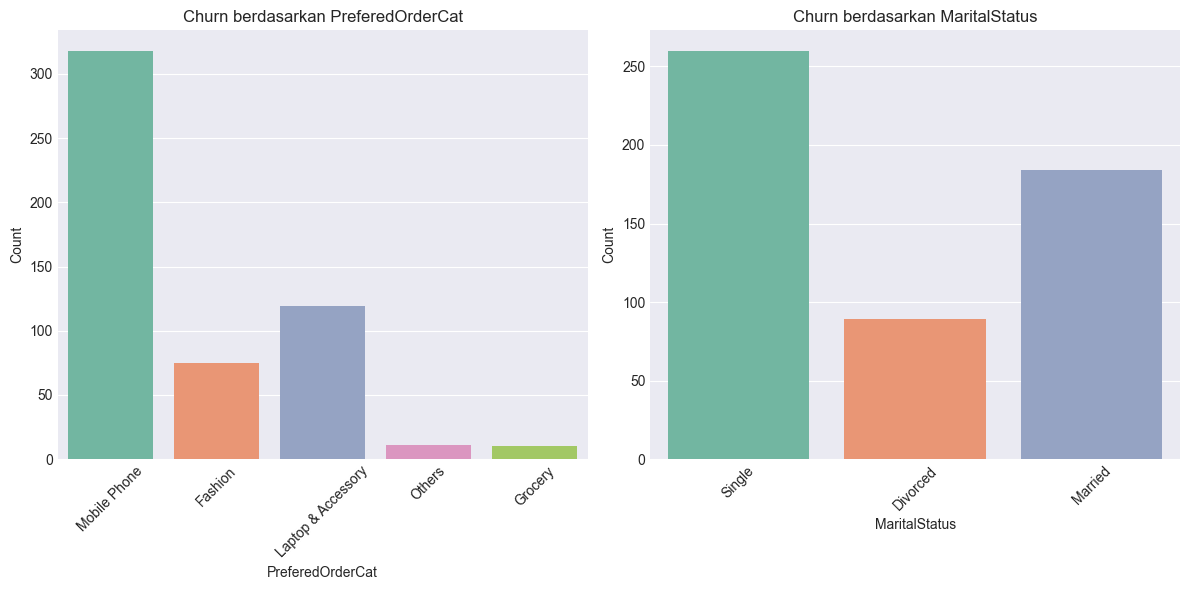

In [170]:
# Daftar kategori yang akan dianalisis
kat = ['PreferedOrderCat', 'MaritalStatus']

plt.style.use('seaborn-v0_8-darkgrid')  # Menggunakan gaya yang valid dari daftar
plt.figure(figsize=(12, 6))  

for index, kategori in enumerate(kat, start=1):  
    plt.subplot(1, 2, index)  # Grid 1x2 untuk 2 variabel
    sns.countplot(x=df[df['Churn']==1][kategori], palette='Set2')  # Menggunakan palet 'Set2'
    plt.title(f'Churn berdasarkan {kategori}', fontsize=12)
    plt.xlabel(kategori)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

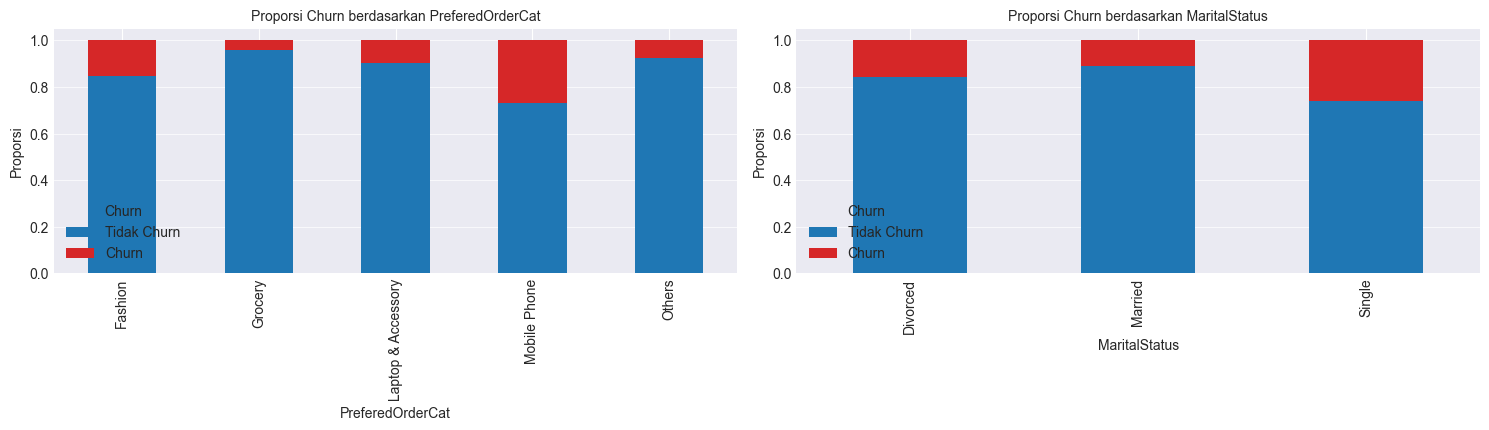

In [173]:
kat = ['PreferedOrderCat', 'MaritalStatus']

plt.style.use('seaborn-v0_8-darkgrid')  # Gaya valid dari daftar yang tersedia
plt.figure(figsize=(15, 7))
for index, kategori in enumerate(kat, start=1):
    ax = plt.subplot(2, 2, index)  # Grid 2x2 untuk variabel
    crosstab = pd.crosstab(df[kategori], df['Churn'], normalize='index').sort_index()
    crosstab.plot(color=['tab:blue', 'tab:red'], kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'Proporsi Churn berdasarkan {kategori}', fontsize=10)
    ax.set_xlabel(kategori)
    ax.set_ylabel('Proporsi')
    ax.legend(title='Churn', labels=['Tidak Churn', 'Churn'])
    ax.grid(axis='y', alpha=0.7)  # Menambahkan grid horizontal
plt.tight_layout()  
plt.show()


Dari data tersebut, tampak bahwa pelanggan yang churn umumnya lebih banyak memilih opsi order melalui Mobile Phone dan memiliki status single.

# Feature Engineering

In [175]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Setelah menganalisis dan membersihkan data, langkah feature engineering yang akan dilakukan meliputi:
- Binning CashbackAmount: Mengubah CashbackAmount yang memiliki variansi tinggi menjadi kategori baru.
- OneHotEncoding untuk MaritalStatus: Mengonversi kolom MaritalStatus yang memiliki 3 kategori menjadi format numerik.
- BinaryEncoding untuk PreferedOrderCat: Mengonversi kolom PreferedOrderCat dengan 5 kategori menggunakan BinaryEncoding.
- Ordinal Encoding untuk CashbackAmountClass: Mengubah CashbackAmountClass yang memiliki urutan kategori dari sangat kecil hingga sangat besar menjadi format numerik.



#### Bining

In [178]:
# binning pada cashbackamount
label_bin= ['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']
df['CashbackAmountClass']= pd.cut(df['CashbackAmount'], 5,labels = label_bin)
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,CashbackAmountClass
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,Sedang
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,Kecil
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,Sedang
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0,Besar
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,Sangat Besar


In [179]:
df.groupby('CashbackAmountClass')['CashbackAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
CashbackAmountClass,,,,,,,,
Sangat Kecil,9.0,20.000000,19.118054,0.00,0.00,25.000,25.0000,56.00
Kecil,429.0,123.620047,4.686553,81.00,121.44,123.800,126.9500,129.96
Sedang,1985.0,160.183703,16.306101,130.22,147.75,157.020,172.6500,194.62
Besar,517.0,220.068221,17.275935,195.05,204.75,218.960,232.4800,259.99
Sangat Besar,324.0,290.180556,18.422611,260.03,273.99,291.895,300.7125,324.99


In [182]:
# Membuat fitur x dan target y
x = df.drop(columns=['Churn'])
y = df['Churn']

# Melakukan data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

# Melihat missing value
print(x_test.isna().sum(), x_test.isna().sum())

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64 Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
CashbackAmountClass         0
dtype: int64


#### Encoding

In [190]:
# Definisi mapping untuk OrdinalEncoder
ordinal_mapping = [
    {'col': 'CashbackAmountClass',
     'mapping': {
         'Sangat Kecil': 0,
         'Kecil': 1,
         'Sedang': 2,
         'Besar': 3,
         'Sangat Besar': 4
     }}
]

# Pipeline untuk encoding
ordinal_encoder = OrdinalEncoder(categories=[['Sangat Kecil', 'Kecil', 'Sedang', 'Besar', 'Sangat Besar']])
binary_encoder = BinaryEncoder(cols=['PreferedOrderCat'])

# ColumnTransformer untuk preprocessing
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus']),
        ('ordinal', ordinal_encoder, ['CashbackAmountClass']),
        ('binary', binary_encoder, ['PreferedOrderCat'])
    ],
    remainder='passthrough'
)

# Menggunakan pipeline jika ada transformasi tambahan
pipeline = Pipeline(steps=[
    ('preprocessor', transformer)
])

# Melihat preview hasil encoding
x_train_transformed = pipeline.fit_transform(x_train)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
testing = pd.DataFrame(x_train_transformed, columns=feature_names)

testing

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,ordinal__CashbackAmountClass,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,4.0,3.0,7.0,0.0,0.0,134.48
1,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,2.0,3.0,1.0,4.0,169.87
2,1.0,0.0,2.0,0.0,0.0,1.0,13.0,8.0,1.0,4.0,2.0,0.0,7.0,142.44
3,0.0,1.0,2.0,0.0,1.0,0.0,1.0,15.0,5.0,3.0,3.0,1.0,3.0,164.89
4,0.0,1.0,2.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,3.0,1.0,4.0,169.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2606,0.0,1.0,2.0,0.0,0.0,1.0,1.0,22.0,1.0,5.0,1.0,0.0,7.0,156.61
2607,0.0,1.0,2.0,0.0,0.0,1.0,17.0,6.0,4.0,3.0,5.0,0.0,2.0,159.85
2608,0.0,1.0,2.0,0.0,1.0,0.0,7.0,15.0,5.0,1.0,2.0,0.0,3.0,148.42
2609,0.0,1.0,2.0,0.0,0.0,1.0,12.0,34.0,4.0,5.0,4.0,0.0,3.0,142.84


# Modeling

Berbagai metode klasifikasi yang akan diuji untuk menentukan model terbaik pada dataset ini meliputi Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest, dan XGBoost.

In [191]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier()

#### Model Benchmarking: SMOTE & K-Fold

Berikut adalah beberapa hal yang diperhatikan dalam benchmark model ini:

- Resampling Data: Karena dataset tidak seimbang, SMOTE diterapkan untuk meningkatkan jumlah data di kelas minoritas.
- Stratified K-Fold: Menggunakan teknik ini untuk memastikan distribusi kelas target (churn) tetap konsisten saat melakukan cross-validation.
- Metrik Evaluasi: ROC-AUC dipilih untuk menilai model karena ia mempertimbangkan probabilitas dan pentingnya kedua kelas.
- Pengaturan Hyperparameter: Hyperparameter digunakan pada nilai default dan semua fitur dimasukkan dalam model.

In [196]:
models = [logreg,knn,dt,rf,xgb]
score=[]
rata=[]
std=[]

for i in models:
    smote_ = SMOTE(random_state=0)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'mean roc_auc':rata,'sdev':std
    }).set_index('model').sort_values(by='mean roc_auc',ascending=False)

,mean roc_auc,sdev
model,,
XGBoost,0.935873,0.002449
Random Forest,0.927135,0.009161
Logistic Regression,0.859965,0.009653
KNN,0.799968,0.020528
Decision Tree,0.770949,0.024856


XGBoost dan Random Forest muncul sebagai model terbaik dengan hyperparameter default, dengan nilai rata-rata ROC-AUC masing-masing 0.935 dan 0.927. Ke-2 model ini akan diuji pada data uji selanjutnya.

#### Model Benchmarking: Test Data

Model di implementasi pada data test

In [197]:
models = [logreg,knn,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    smote_ = SMOTE(random_state=0)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote_),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.97      0.75      0.85       546
           1       0.41      0.88      0.56       107

    accuracy                           0.77       653
   macro avg       0.69      0.81      0.70       653
weighted avg       0.88      0.77      0.80       653

KNN 
               precision    recall  f1-score   support

           0       0.95      0.76      0.85       546
           1       0.40      0.79      0.53       107

    accuracy                           0.77       653
   macro avg       0.67      0.78      0.69       653
weighted avg       0.86      0.77      0.79       653

Decision Tree 
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       546
           1       0.60      0.68      0.64       107

    accuracy                           0.87       653
   macro avg       0.77      0.80      0.78       653
weighted avg       0.88      0

,roc_auc score
model,
Random Forest,0.954101
XGBoost,0.950772
Logistic Regression,0.910445
KNN,0.841361
Decision Tree,0.796250


Hasil menunjukkan bahwa XGBoost dan Random Forest memiliki ROC-AUC tertinggi, yaitu 0.954 dan 0.955. Langkah berikutnya adalah mengoptimalkan hyperparameter kedua model ini untuk meningkatkan kinerjanya dan membandingkan hasilnya.

### Hyperparameter Tuning

In [199]:
smote_ = SMOTE(random_state=0)
xgb = XGBClassifier(random_state=0)
Pipe_rf = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_rf', rf)]) 
Pipe_xgb = Pipeline([('preprocess', transformer),('resampling', smote_), ('model_xgb', xgb)])
skfold=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
              'model_rf__n_estimators':[200, 220], 
              'model_rf__max_depth':[13,17],
              'model_rf__min_samples_split':[2, 3],
              'model_rf__min_samples_leaf':[2, 3]
             }]

rf_grid = GridSearchCV(estimator = Pipe_rf,
                      param_grid = hyperparam_rf, 
                      cv = skfold, 
                      scoring = 'roc_auc',
                      error_score='raise',
                      verbose = 2)
rf_grid.fit(x_train,y_train)

# XGBoost Hyperparameter Tuning
hyperparam_xgb = [{
              'model_xgb__n_estimators':[190, 200],
              'model_xgb__subsample':[0.8,1],
              'model_xgb__max_depth':[17, 19],
              'model_xgb__learning_rate':[ 0.3,0.08],
              'model_xgb__random_state':[0]}]

xgb_grid = GridSearchCV(estimator = Pipe_xgb,
                      param_grid = hyperparam_xgb, 
                      cv = skfold, 
                      scoring = 'roc_auc', 
                      error_score='raise',
                      verbose = 2)
xgb_grid.fit(x_train,y_train)            

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.7s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=2, model_rf__n_estimators=200; total time=   1.4s
[CV] END model_rf__max_depth=13, model_rf__min_samples_leaf=2, model_rf__min_samples_split=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(categories=[['Sangat '
                                                                                                     'Kecil',
                                                                                                     'Kecil',
                                                                                                     'Sedang',
                                                                                                     'Besar',
                                                                                                     'Sangat '
                                                                                                     'Besar']]),
                                                                         ['Cas...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=0, ...))]),
             param_grid=[{'model_xgb__learning_rate': [0.3, 0.08],
                          'model_xgb__max_depth': [17, 19],
                          'model_xgb__n_estimators': [190, 200],
                          'model_xgb__random_state': [0],
                          'model_xgb__subsample': [0.8, 1]}],
             scoring='roc_auc', verbose=2)

In [200]:
# Random Forest
print('Random Forest Hyperparameter')
print(rf_grid.best_score_)
print(rf_grid.best_params_)
# XGBoost 
print('XGBoost Hyperparameter')
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)    

Random Forest Hyperparameter
0.9270147943127125
{'model_rf__max_depth': 17, 'model_rf__min_samples_leaf': 2, 'model_rf__min_samples_split': 2, 'model_rf__n_estimators': 220}
XGBoost Hyperparameter
0.94094075608407
{'model_xgb__learning_rate': 0.08, 'model_xgb__max_depth': 17, 'model_xgb__n_estimators': 200, 'model_xgb__random_state': 0, 'model_xgb__subsample': 0.8}


Hyperparameter tuning dilakukan dengan membandingkan pengaturan default dan nilai yang dioptimalkan melalui grid search. Hasil terbaik yang ditemukan adalah:

- Random Forest: ROC-AUC tertinggi sebesar 0.927 dengan max depth 17, min sample leaf 2, min sample split 2 (default), dan n_estimator 220.
- XGBoost: ROC-AUC tertinggi sebesar 0.940 dengan learning rate 0.08, max depth 17, n_estimator 200, dan subsample 0.8.

Karena XGBoost memberikan hasil ROC-AUC yang lebih tinggi dibandingkan Random Forest, selanjutnya akan dilanjutkan dengan menggunakan XGBoost.

In [201]:
# Model XGBoost Tuned
best_model = xgb_grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Sangat '
                                                                              'Kecil',
                                                                              'Kecil',
                                                                              'Sedang',
                                                                              'Besar',
                                                                              'Sangat '
                                                                              'Besar']]),
                                                  ['CashbackAmountClass']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['PreferedOrderCat']),
                                                  ['PreferedOrderCat'])])),
                ('resam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.08,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=17, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [202]:
# Model XGBoost Default
xgb = XGBClassifier()
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote_),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Sangat '
                                                                              'Kecil',
                                                                              'Kecil',
                                                                              'Sedang',
                                                                              'Besar',
                                                                              'Sangat '
                                                                              'Besar']]),
                                                  ['CashbackAmountClass']),
                                                 ('binary',
                                                  BinaryEncoder(cols=['PreferedOrderCat']),
                                                  ['PreferedOrderCat'])])),
                ('resam...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [203]:
# Melihat perbandingan model dengan default dan hyperparameter tuning
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default xgb : ', roc_auc_default)
print('ROC AUC Score Tuned xgb : ', roc_auc_tuned)

ROC AUC Score Default xgb :  0.9507719694635582
ROC AUC Score Tuned xgb :  0.9524665365786861


In [204]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost : \n', report_default)
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Default XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.77      0.69      0.73       107

    accuracy                           0.92       653
   macro avg       0.86      0.83      0.84       653
weighted avg       0.91      0.92      0.91       653

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       546
           1       0.74      0.70      0.72       107

    accuracy                           0.91       653
   macro avg       0.84      0.83      0.83       653
weighted avg       0.91      0.91      0.91       653



In [205]:
# Model Akhir
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)

### Feature Importances

Melihat fitur yang paling mempengaruhi potensi pelanggan churn

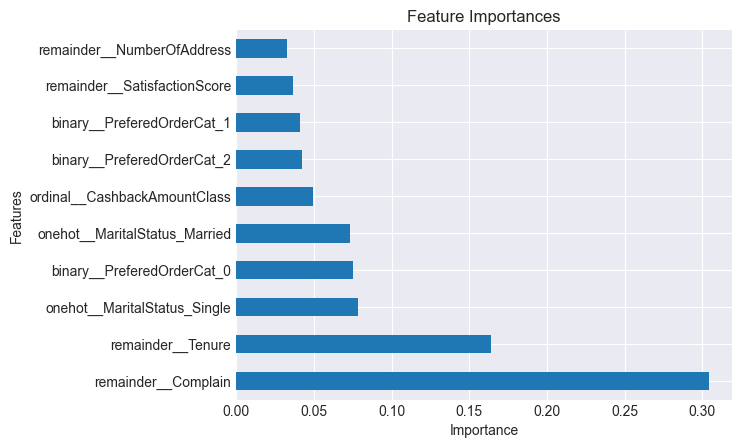

In [210]:
feature_importances = pd.Series(best_model[2].feature_importances_, index=transformer.get_feature_names_out())
# Ambil 10 fitur terpenting
top_features = feature_importances.sort_values(ascending=False).head(10)
# Plotting
top_features.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Dari analisis tersebut, faktor utama yang berpengaruh terhadap potensi churn pelanggan adalah complain, diikuti oleh tenure, dan kategori yang disukai pelanggan. Untuk mengoptimalkan model, sebaiknya diterapkan feature selection atau kombinasi fitur yang relevan guna mengurangi kompleksitas dan membandingkannya dengan model yang ada saat ini.

Dari sisi bisnis, wawasan ini memberikan informasi penting. Perusahaan harus fokus pada penyelesaian keluhan pelanggan secara efektif, baik terkait dengan platform e-commerce maupun marketplace. Selain itu, untuk meningkatkan retensi pelanggan, perusahaan dapat mempertimbangkan promosi yang menarik secara berkelanjutan, seperti program langganan atau penawaran khusus.

#### Model akhir

In [213]:
# Export model
best_model = xgb_grid.best_estimator_
Churn_model = best_model.fit(x_train, y_train)
pickle.dump(Churn_model, open('Model_Final.sav', 'wb'))

# Conclusion and Recommendation

#### Kesimpulan

In [214]:
print('Classification Report Tuned XGBoost : \n', report_tuned)

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       546
           1       0.74      0.70      0.72       107

    accuracy                           0.91       653
   macro avg       0.84      0.83      0.83       653
weighted avg       0.91      0.91      0.91       653



Berdasarkan hasil analisis, model yang dibuat dapat mendeteksi 95% pelanggan yang tidak churn dan 70% pelanggan yang churn, menurut metrik recall. Akurasi prediksi untuk pelanggan yang akan churn mencapai 74%.

Dengan biaya mempertahankan pelanggan sebesar $10 dan biaya untuk mendapatkan pelanggan baru sebesar $40, serta total 3264 pelanggan, 533 di antaranya churn dan 2731 tidak churn, perhitungannya adalah sebagai berikut:

Tanpa Model (Penawaran kepada semua pelanggan):
- Total Biaya: 3264 pelanggan × $10 = $32,640
- Pelanggan churn yang ditemukan: 533 orang
- Pelanggan churn yang tidak ditemukan: 0 orang
- Pelanggan tidak churn yang ditemukan: 2731 orang
- Pelanggan tidak churn yang tidak ditemukan: 0 orang
- Biaya yang terbuang: 2731 × $10 = $27,310

Dengan Model (Penawaran berdasarkan prediksi):
- Total Biaya: (533 × 0.70) × $10 = $3,731
- Pelanggan churn yang ditemukan: 533 × 0.70 = 374 orang
- Pelanggan churn yang tidak ditemukan: 159 + (2731 × 0.04) = 268 orang
- Pelanggan tidak churn yang ditemukan: 2731 × 0.95 = 2595 orang
- Pelanggan tidak churn yang tidak ditemukan: 136 orang
- Biaya yang terbuang: (136 × $10) + (268 × $40) = $1,360 + $10,720 = $12,080
- Penghematan: $27,310 - $12,080 = $15,230

Dengan menerapkan model ini, perusahaan e-commerce dapat menghemat biaya secara signifikan dengan melakukan pemasaran yang lebih tepat sasaran.

Selain itu, faktor-faktor yang paling mempengaruhi churn adalah keluhan pelanggan dan masa tenure. Oleh karena itu, penting bagi perusahaan untuk fokus pada pelanggan yang sering mengeluh dan memiliki masa tenure yang lebih pendek untuk mengurangi risiko churn.

#### Rekomendasi

1. Bisnis:
    - Berikan penawaran menarik seperti promo atau cashback untuk pelanggan baru (0-2 bulan) agar mereka tetap setia menggunakan platform.
    - Tangani keluhan pelanggan dengan memperbaiki pengalaman pengguna, menambah variasi produk, dan meningkatkan layanan pelanggan.
    - Tawarkan diskon ongkos kirim untuk pelanggan yang tinggal jauh dari gudang.
    - Gunakan model machine learning untuk memandu strategi pemasaran yang lebih efektif.

2. Model:
    - Pastikan data memiliki ID pelanggan untuk menghindari duplikasi dan tidak ada nilai yang hilang.
    - Tambahkan fitur terkait layanan dan transaksi pelanggan, seperti waktu pengiriman dan kepuasan layanan.
    - Lakukan tuning hyperparameter lebih lanjut dan coba fitur tambahan untuk meningkatkan kinerja model.
    - Sesuaikan threshold untuk meningkatkan nilai recall dan uji kombinasi fitur untuk menyederhanakan model.